In [1]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
df = pd.read_csv("AAME.csv") # 컬럼이 없을때는 header = None 붙이기. 
# delim_whitespace = True 공백이 있으면 이거 붙이기

# 컬럼을 붙이고 싶다면 
# df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'label']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
aameValue = df[['Open', 'High', 'Low', 'Close']]

In [4]:
# 스케일링
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(aameValue)
scaled

array([[0.        , 0.23515054, 0.2312812 , 0.22213181],
       [0.        , 0.23189585, 0.22795341, 0.21887713],
       [0.        , 0.23515054, 0.2312812 , 0.22213181],
       ...,
       [0.16304348, 0.1179821 , 0.11680534, 0.11017088],
       [0.15289854, 0.10886899, 0.11547421, 0.10886899],
       [0.15289854, 0.11147275, 0.11547421, 0.11147275]])

In [5]:
# 결측치 제거. 4개 피쳐 중 하나라도 0이 있으면 그 행은 제거

filtered_scaled = scaled[~np.any(scaled == 0, axis=1)]
print(filtered_scaled.shape)
filtered_scaled

(8517, 4)


array([[0.27536231, 0.21887713, 0.22795341, 0.21887713],
       [0.25362318, 0.19934906, 0.20798669, 0.19934906],
       [0.25362318, 0.19934906, 0.20798669, 0.19934906],
       ...,
       [0.16304348, 0.1179821 , 0.11680534, 0.11017088],
       [0.15289854, 0.10886899, 0.11547421, 0.10886899],
       [0.15289854, 0.11147275, 0.11547421, 0.11147275]])

In [6]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [7]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window, -1])
    return  np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [8]:
# LSTM 모델
model = Sequential()
model.add(LSTM(16,
               input_shape = (X_train.shape[1], X_train.shape[2]),
               activation = 'tanh',
               return_sequences = False)
         )
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100


C:\Users\송민수\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0168
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.1235e-04
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5695e-04
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4014e-04
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3590e-04
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3163e-04
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2116e-04
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.1871e-04
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.6714e-05
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0668e-04
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.4186e-05
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8.8103e-05
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.1622e-05
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.6438e-05
Epo

In [9]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


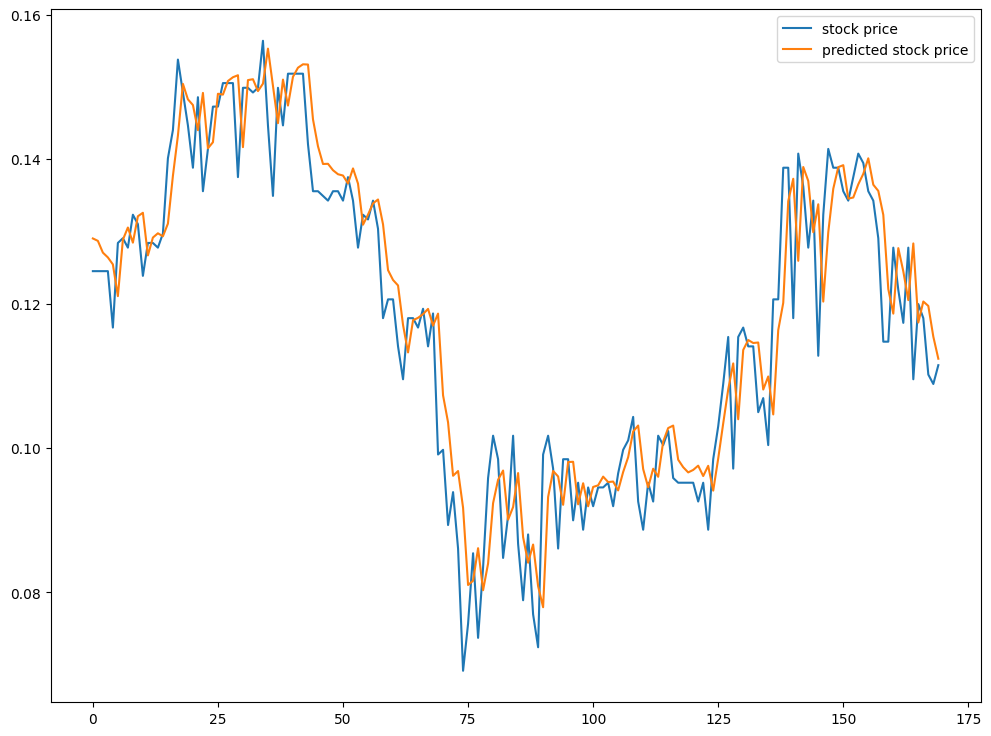

In [10]:
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred.ravel())
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.812336736804446e-05


In [15]:
# RNN 모델
from tensorflow.keras.layers import SimpleRNN

X_train, y_train = make_sample(train_data, 30)

model = Sequential()
model.add(SimpleRNN(30, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100


C:\Users\송민수\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0175
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4273e-04
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2933e-04
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9474e-04
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6271e-04
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4639e-04
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4577e-04
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2971e-04
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3326e-04
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4199e-04
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1712e-04
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0652e-04
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0865e-04
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1380e-04
Epo

In [16]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


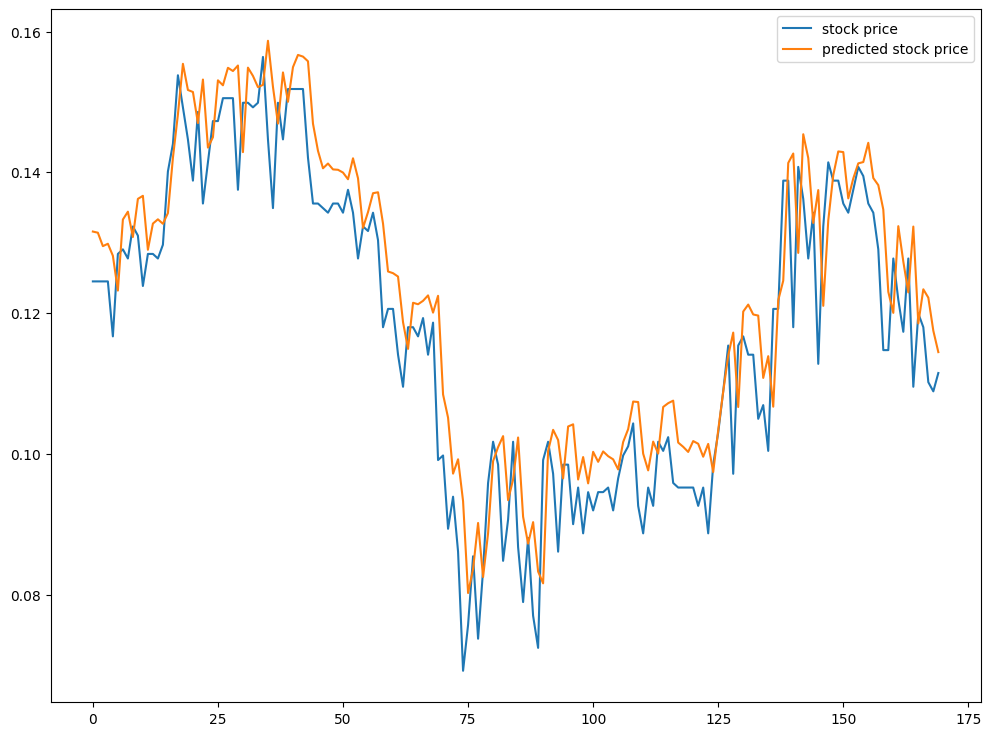

In [17]:
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [18]:
mse = mean_squared_error(y_test, pred.ravel())
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 8.282882320337142e-05
